In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv("Marketing_Analysis.csv")

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_22840\398887362.py:1: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Marketing_Analysis.csv")


In [50]:
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


# skipping 1st two rows to get clean columns and respective data

In [51]:
df=pd.read_csv("Marketing_Analysis.csv",skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [52]:
# shape of data
df.shape

(45211, 19)

In [18]:
# size  of data
df.size

859009

In [19]:
# info  of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [20]:
# describe on data (note down your own insights)
df.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


# Insights

   ### 1.This data is only for 18+ people.
   ### 2.Some of people are salaried as min salary is 0.
   ### 3.some of them are defaulters as balance is in negative.

In [21]:
# describe on data (note down your own insights) for categorical variable
pd.Categorical(df)

['customerid', 'age', 'salary', 'balance', 'marital', ..., 'campaign', 'pdays', 'previous', 'poutcome', 'response']
Length: 19
Categories (19, object): ['age', 'balance', 'campaign', 'contact', ..., 'previous', 'response', 'salary', 'targeted']

# unused columns / drop them (reason)


In [22]:
#customer id 
#df=df.drop(["customerid"], axis=1, inplace=True)

In [23]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [24]:
# jobedu is combination of job and education , separate them out
df[['job', 'education']]=df["jobedu"].str.split(",",n=1,expand=True)

In [25]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,...,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,...,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,...,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,...,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [26]:
# check diff categories in contact feature
df["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [27]:
# null values
df.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
education      0
dtype: int64

In [43]:
# check for outlier
df.columns
for i in z:
    print(plt.boxplot(i))
          
#df.boxplot(figsize=(10,20))

TypeError: cannot perform reduce with flexible type

In [29]:
# impute null values 
df.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
education      0
dtype: int64

In [30]:
df["age_new"]=df["age"].fillna(df["age"].mode)
df["month_new"]=df["month"].fillna(df["month"].mode)
df["response_new"]=df["response"].fillna(df["response"].mode)

In [31]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,campaign,pdays,previous,poutcome,response,job,education,age_new,month_new,response_new
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,1,-1,0,unknown,no,management,tertiary,58.0,"may, 2017",no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,1,-1,0,unknown,no,technician,secondary,44.0,"may, 2017",no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,1,-1,0,unknown,no,entrepreneur,secondary,33.0,"may, 2017",no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,1,-1,0,unknown,no,blue-collar,unknown,47.0,"may, 2017",no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,1,-1,0,unknown,no,unknown,unknown,33.0,"may, 2017",no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,...,3,-1,0,unknown,yes,technician,tertiary,51.0,"nov, 2017",yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,...,2,-1,0,unknown,yes,retired,primary,71.0,"nov, 2017",yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,...,5,184,3,success,yes,retired,secondary,72.0,"nov, 2017",yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,...,4,-1,0,unknown,no,blue-collar,secondary,57.0,"nov, 2017",no


In [32]:
# plot bar graph of job categories
df["job"].unique

<bound method Series.unique of 0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object>

In [33]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

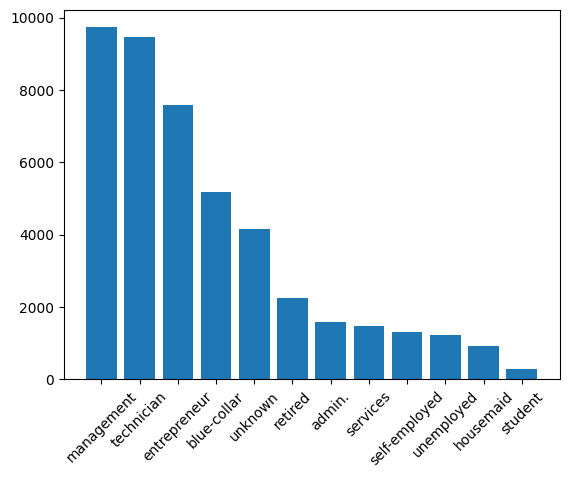

In [34]:
import matplotlib.pyplot as plt

plt.bar(df["job"].unique(), df["job"].value_counts())
plt.xticks(rotation=45)
plt.show()

# plot pie chart of education category


In [35]:
a=df["education"].value_counts()
b=a.index

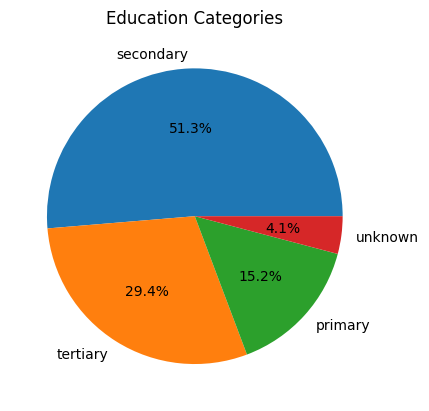

In [36]:
plt.pie(a,labels=b,autopct='%1.1f%%')
plt.title("Education Categories")
plt.show()

# visualise age vs balance using scatter plot


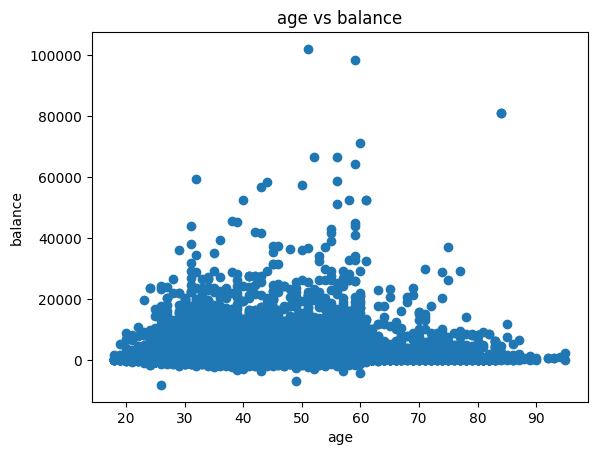

In [37]:
plt.scatter(df["age"],df["balance"])
plt.xlabel("age")
plt.ylabel("balance")
plt.title("age vs balance")
plt.show()

# visualise salary vs balance using scatter plot


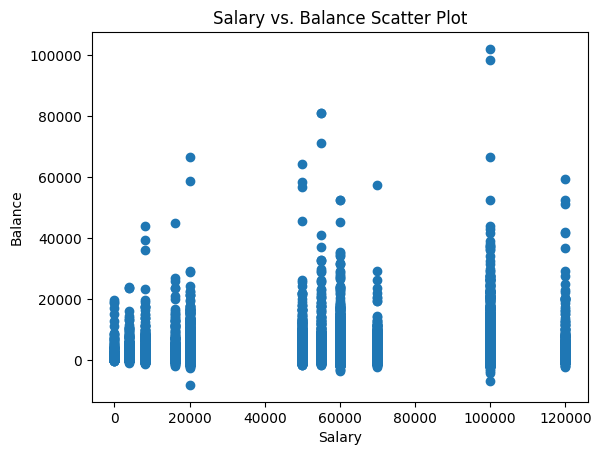

In [38]:
plt.scatter(df["salary"], df["balance"])
plt.xlabel("Salary")
plt.ylabel("Balance")
plt.title("Salary vs. Balance Scatter Plot")
plt.show()

# draw heat map for only age, salary , balance

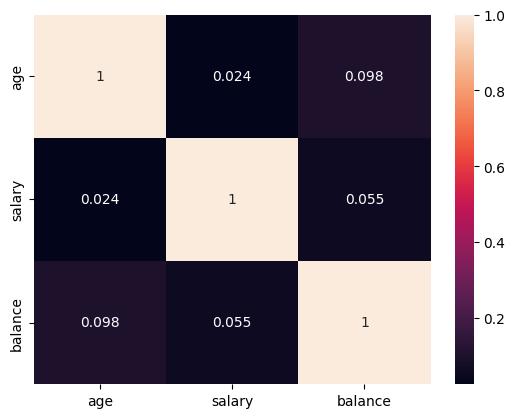

In [55]:
sns.heatmap(df[["age", "salary", "balance"]].corr(),annot=True)
plt.show()